

**Import the Libraries**



In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt

**Load The Dataset**

In [2]:

data = pd.read_csv('Assessment 2 - MMM Weekly.csv')


print(data.head())
print(data.info())

         week  facebook_spend  google_spend  tiktok_spend  instagram_spend  \
0  2023-09-17         6030.80       3130.14       2993.22          1841.08   
1  2023-09-24         5241.44       2704.00          0.00             0.00   
2  2023-10-01         5893.00          0.00          0.00             0.00   
3  2023-10-08         7167.16          0.00          0.00             0.00   
4  2023-10-15         5360.29          0.00          0.00          3237.15   

   snapchat_spend  social_followers  average_price  promotions  emails_send  \
0         2204.72                 0         101.95           0       102684   
1            0.00                 0         103.86           0        96573   
2            0.00                 0         100.38           0        96797   
3            0.00                 0         103.14           1        99098   
4            0.00                 0         107.76           1       120754   

   sms_send   revenue  
0     20098  83124.16  
1     29



**Dimension of Dataframe**



In [3]:
data.shape


(104, 12)

 **Convert 'week' column to datetime format, then sort data by week in ascending order and reset the index**


In [4]:
data['week'] = pd.to_datetime(data['week'])
data = data.sort_values('week').reset_index(drop=True)


**Check dataset shape, date range, unique/duplicate weeks, and preview basic stats**


In [5]:
print(data.shape)
print('start, end:', data['week'].min(), data['week'].max())
print('unique weeks:', data['week'].nunique())
print('duplicates:', data['week'].duplicated().sum())
display(data.head())
display(data.describe())


(104, 12)
start, end: 2023-09-17 00:00:00 2025-09-07 00:00:00
unique weeks: 104
duplicates: 0


,week,facebook_spend,google_spend,tiktok_spend,instagram_spend,snapchat_spend,social_followers,average_price,promotions,emails_send,sms_send,revenue
0,2023-09-17,6030.80,3130.14,2993.22,1841.08,2204.72,0,101.95,0,102684,20098,83124.16
1,2023-09-24,5241.44,2704.00,0.00,0.00,0.00,0,103.86,0,96573,29920,373.02
2,2023-10-01,5893.00,0.00,0.00,0.00,0.00,0,100.38,0,96797,22304,513.01
3,2023-10-08,7167.16,0.00,0.00,0.00,0.00,0,103.14,1,99098,14171,452.78
4,2023-10-15,5360.29,0.00,0.00,3237.15,0.00,0,107.76,1,120754,30207,41441.95


,week,facebook_spend,google_spend,tiktok_spend,instagram_spend,snapchat_spend,social_followers,average_price,promotions,emails_send,sms_send,revenue
count,104,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,2024-09-11 12:00:00,5346.302500,1543.866442,955.632212,1019.342885,747.465000,72414.509615,99.962500,0.211538,120691.067308,23623.115385,49053.945096
min,2023-09-17 00:00:00,2456.940000,0.000000,0.000000,0.000000,0.000000,0.000000,87.560000,0.000000,68655.000000,10460.000000,1.000000
25%,2024-03-15 06:00:00,4538.977500,0.000000,0.000000,0.000000,0.000000,38318.250000,94.207500,0.000000,102971.500000,19252.500000,474.852500
50%,2024-09-11 12:00:00,5293.780000,0.000000,0.000000,0.000000,0.000000,81109.500000,99.490000,0.000000,120237.000000,22459.500000,972.065000
75%,2025-03-10 18:00:00,6033.325000,3374.205000,2487.172500,2395.350000,1705.872500,110281.250000,105.395000,0.000000,136594.000000,28107.000000,45773.732500
max,2025-09-07 00:00:00,9325.180000,6083.160000,4143.250000,3877.990000,3126.040000,143477.000000,113.380000,1.000000,185460.000000,40153.000000,398453.530000
std,NaN,1168.961177,1863.350279,1376.993132,1349.184250,982.088273,47778.448985,6.496186,0.410377,25158.181476,6661.362493,93329.607019


**Generate full weekly range and identify any missing weeks in the dataset**


In [6]:
full_weeks = pd.date_range(start=data['week'].min(), end=data['week'].max(), freq='W-SUN')
missing = full_weeks.difference(data['week'])
print('missing weeks:', missing)


missing weeks: DatetimeIndex([], dtype='datetime64[ns]', freq='W-SUN')


**Add missing weeks to the dataset with 0 values for other columns, then sort and reset index**



In [7]:
if len(missing) > 0:
    empty = pd.DataFrame({'week': missing})
    for c in data.columns:
        if c != 'week':
            empty[c] = 0
    data = pd.concat([data, empty], ignore_index=True).sort_values('week').reset_index(drop=True)


**Remove duplicate weeks and reset index**


In [8]:
data = data.drop_duplicates(subset='week').reset_index(drop=True)


**Plot weekly revenue trend over time**


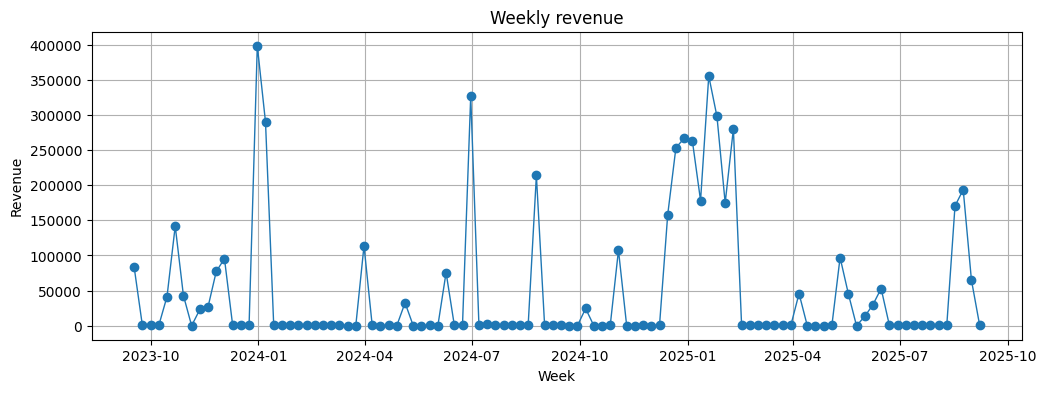

In [9]:
plt.figure(figsize=(12,4))
plt.plot(data['week'], data['revenue'], marker='o', linewidth=1)
plt.title('Weekly revenue')
plt.ylabel('Revenue')
plt.xlabel('Week')
plt.grid(True)
plt.show()


**Add time index, week number, month, and year features from 'week' column**


In [10]:
data['t'] = np.arange(len(data))
data['week_of_year'] = data['week'].dt.isocalendar().week
data['month'] = data['week'].dt.month
data['year'] = data['week'].dt.year


 **Add Fourier series terms to model annual seasonality (period=52 weeks, 3 harmonics)**





In [11]:
def fourier_series(df, period=52, order=3, prefix='annual'):
    t = np.arange(len(df))
    for k in range(1, order+1):
        df[f'{prefix}_sin_{k}'] = np.sin(2*np.pi*k*t/period)
        df[f'{prefix}_cos_{k}'] = np.cos(2*np.pi*k*t/period)
    return df

data = fourier_series(data, period=52, order=3, prefix='annual')


 **Create lag features (1–4 weeks) for ad spend and revenue to capture delayed effects**


In [12]:
lags = [1,2,3,4]
cols_to_lag = ['facebook_spend','tiktok_spend','instagram_spend','snapchat_spend','google_spend','revenue']
for col in cols_to_lag:
    for lag in lags:
        data[f'{col}_lag{lag}'] = data[col].shift(lag)


**Apply adstock transformation to model diminishing carryover effects of past ad spend**


In [13]:
def adstock(series, decay):
    out = np.zeros(len(series))
    for i in range(len(series)):
        if i == 0:
            out[i] = series.iloc[i]
        else:
            out[i] = series.iloc[i] + decay * out[i-1]
    return pd.Series(out, index=series.index)


data['facebook_adstock'] = adstock(data['facebook_spend'], decay=0.5)
data['tiktok_adstock']   = adstock(data['tiktok_spend'], decay=0.5)
data['instagram_adstock'] = adstock(data['instagram_spend'], decay=0.5)
data['snapchat_adstock'] = adstock(data['snapchat_spend'], decay=0.5)
data['google_adstock']    = adstock(data['google_spend'], decay=0.5)




**Clip negative values to 0 and apply log(1+x) transform to stabilize variance and model diminishing returns**


In [14]:



spend_cols = ['facebook_spend','tiktok_spend','instagram_spend','snapchat_spend','google_spend']


data[spend_cols] = data[spend_cols].clip(lower=0)
data['revenue'] = data['revenue'].clip(lower=0)
data['average_price'] = data['average_price'].clip(lower=0)


for c in spend_cols:
    data[f'log1p_{c}'] = np.log1p(data[c])

data['log1p_revenue'] = np.log1p(data['revenue'])
data['log_price'] = np.log1p(data['average_price'])



 **Standardize numeric feature columns (mean=0, std=1) for modeling**


In [15]:
from sklearn.preprocessing import StandardScaler
num_cols = data.select_dtypes(include=['float64','int64']).columns.tolist()

non_features = ['year','week_of_year','month','t','week']
for nf in non_features:
    if nf in num_cols:
        num_cols.remove(nf)

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


 **Drop rows with missing values and reset index**


In [16]:
data = data.dropna().reset_index(drop=True)


**Compute and display correlation matrix among ad spend channels**


In [17]:
corr = data.corr()

print(corr.loc[spend_cols + ['google_spend'], spend_cols + ['google_spend']])


                 facebook_spend  tiktok_spend  instagram_spend  \
facebook_spend         1.000000      0.116502         0.045594   
tiktok_spend           0.116502      1.000000         0.031476   
instagram_spend        0.045594      0.031476         1.000000   
snapchat_spend         0.055274      0.178313         0.154265   
google_spend          -0.028237     -0.055505         0.074438   
google_spend          -0.028237     -0.055505         0.074438   

                 snapchat_spend  google_spend  google_spend  
facebook_spend         0.055274     -0.028237     -0.028237  
tiktok_spend           0.178313     -0.055505     -0.055505  
instagram_spend        0.154265      0.074438      0.074438  
snapchat_spend         1.000000      0.044981      0.044981  
google_spend           0.044981      1.000000      1.000000  
google_spend           0.044981      1.000000      1.000000  


**Export cleaned dataset to CSV without row indices**


In [18]:
data.to_csv('cleaned_data.csv', index=False)
